In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('level3_resnet.csv')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
p = 0.99

In [4]:
def hist(df, features):
    melt = metric_melt(df.sample(200),
            features=features,
            metadata_features=meta_features)
    #bins = np.arange(-0.005, 0.005, 0.001)
    plt.style.use({'figure.facecolor':'white'})
    plt.hist(melt.similarity_metric)
def feats(df):
    features_ = []
    for col in df.columns.tolist():
        if col.startswith('resnet_'):
            features_.append(col)
    return features_

In [5]:
features = feats(df)
meta_features = []
for col in df.columns.tolist():
    if col.startswith('Metadata_'):
        meta_features.append(col)

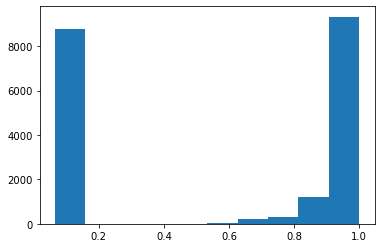

In [6]:
# plot the similarity of the wells. Expected output from a pretrained net.
hist(df,features)

Explained variation per principal component: [9.99702345e-01 1.36066373e-04 4.97430054e-05]


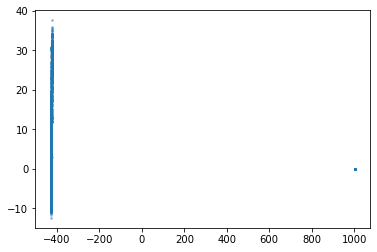

In [7]:
def pca_plot(df):
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(df[features].values)
    df['pca-one'] = pca_result[:,0]
    df['pca-two'] = pca_result[:,1]
    df['pca-three'] = pca_result[:,2]
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
    plt.style.use({'figure.facecolor':'white'})
    plt.scatter(df['pca-one'], df['pca-two'], s = 3, alpha= 0.4)
    plt.show()
pca_plot(df)


In [12]:
max_vals = df.max()

In [14]:
#.count(0)
np.unique(max_vals[features].values, return_counts=True)
# over 1800 zero vectors!

(array([0.0, 7.218433779598854e-07, 7.558077868452528e-06, ...,
        134.93582153320312, 155.24569702148438, 322.0402526855469],
       dtype=object),
 array([1812,    1,    1, ...,    5,    5,    5]))

(array([9.88e+03, 2.65e+02, 6.50e+01, 1.50e+01, 1.00e+01, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 5.00e+00]),
 array([0.0, 32.20402526855469, 64.40805053710938, 96.61207580566406,
        128.81610107421875, 161.02012634277344, 193.22415161132812,
        225.4281768798828, 257.6322021484375, 289.8362274169922,
        322.0402526855469], dtype=object),
 <BarContainer object of 10 artists>)

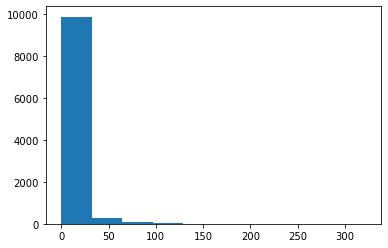

In [15]:
plt.hist(max_vals[features].values)

In [16]:
dropls = []
for c in features:
    if df[c].max() < 1e-2:
        dropls.append(c)

In [19]:
df[df['pca-one'] > 100].Metadata_broad_sample.value_counts()

DMSO                      936
BRD-K72414522-001-06-7      5
BRD-K81957469-001-01-0      5
BRD-K69776681-001-03-8      5
BRD-K73196317-003-14-8      5
                         ... 
BRD-K99604664-001-01-1      1
BRD-A90799790-001-19-9      1
BRD-K50938287-036-13-8      1
BRD-A89164055-001-03-3      1
BRD-K46290096-001-01-1      1
Name: Metadata_broad_sample, Length: 736, dtype: int64

In [20]:
normal = df[df['pca-one'] < 100]

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

Explained variation per principal component: [0.45778823 0.16715446 0.09429529]


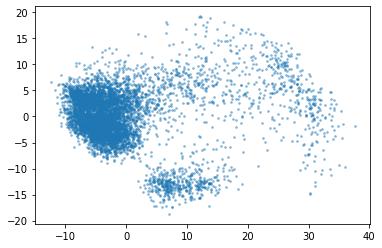

In [21]:
pca_plot(normal)

In [26]:
df[df['pca-one'] > 100][features].iloc[1].sort_values(ascending=False)

resnet_554      322.040253
resnet_6698     322.040253
resnet_2602     322.040253
resnet_4650     322.040253
resnet_8746     322.040253
                   ...    
resnet_4116       0.000000
resnet_4115       0.000000
resnet_4114       0.000000
resnet_4113       0.000000
resnet_10239      0.000000
Name: 1, Length: 10240, dtype: float64

In [ ]:
df.drop(columns=dropls, inplace=True)

In [19]:
features = feats(df)

In [22]:
melt = metric_melt(df.sample(200),
            features=features,
            metadata_features=meta_features)

In [24]:
dmso = df.query("Metadata_broad_sample == 'DMSO'")

In [29]:
melt = metric_melt(dmso.sample(500),
            features=features,
            metadata_features=meta_features)

In [34]:
melt.query("similarity_metric < 0.05")

,Metadata_Plate_pair_a,Metadata_Well_pair_a,Metadata_broad_sample_pair_a,Metadata_moa_pair_a,Metadata_mmoles_per_liter_pair_a,Metadata_dose_recode_pair_a,Metadata_Plate_pair_b,Metadata_Well_pair_b,Metadata_broad_sample_pair_b,Metadata_moa_pair_b,Metadata_mmoles_per_liter_pair_b,Metadata_dose_recode_pair_b,pair_a_index,pair_b_index,similarity_metric
1508,SQ00015205,F07,DMSO,unknown,0.0,0,SQ00015157,F08,DMSO,unknown,0.0,0,3,18,0.048387
1509,SQ00015205,F07,DMSO,unknown,0.0,0,SQ00015162,B06,DMSO,unknown,0.0,0,3,19,0.048697
1590,SQ00015205,F07,DMSO,unknown,0.0,0,SQ00015116,J17,DMSO,unknown,0.0,0,3,100,0.049877
1603,SQ00015205,F07,DMSO,unknown,0.0,0,SQ00015162,F10,DMSO,unknown,0.0,0,3,113,0.048697
1639,SQ00015205,F07,DMSO,unknown,0.0,0,SQ00015149,F07,DMSO,unknown,0.0,0,3,149,0.049214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124601,SQ00015160,F09,DMSO,unknown,0.0,0,SQ00015201,J18,DMSO,unknown,0.0,0,482,487,0.045582
124602,SQ00015160,F09,DMSO,unknown,0.0,0,SQ00014817,F08,DMSO,unknown,0.0,0,482,488,0.045582
124605,SQ00015160,F09,DMSO,unknown,0.0,0,SQ00014812,J18,DMSO,unknown,0.0,0,482,491,0.045582
124607,SQ00015160,F09,DMSO,unknown,0.0,0,SQ00015211,B04,DMSO,unknown,0.0,0,482,493,0.045582


In [31]:
melt.columns

Index(['Metadata_Plate_pair_a', 'Metadata_Well_pair_a',
       'Metadata_broad_sample_pair_a', 'Metadata_moa_pair_a',
       'Metadata_mmoles_per_liter_pair_a', 'Metadata_dose_recode_pair_a',
       'Metadata_Plate_pair_b', 'Metadata_Well_pair_b',
       'Metadata_broad_sample_pair_b', 'Metadata_moa_pair_b',
       'Metadata_mmoles_per_liter_pair_b', 'Metadata_dose_recode_pair_b',
       'pair_a_index', 'pair_b_index', 'similarity_metric'],
      dtype='object')

In [42]:
dmso[features].idxmax()

resnet_0        1085
resnet_1           0
resnet_2           0
resnet_3           0
resnet_4        1171
                ... 
resnet_10232    2509
resnet_10235    2509
resnet_10236    1157
resnet_10237     884
resnet_10238    1895
Length: 7847, dtype: int64

In [43]:
dmso[features].idxmax().value_counts()

0       3811
2522     522
386      264
1096     214
898      150
        ... 
914        1
329        1
2400       1
2416       1
1973       1
Length: 667, dtype: int64

In [54]:
sorted = dmso.sort_values(by=['pca-one'], ascending=False)

In [53]:
dmso[features].iloc[0].sort_values( ascending=False)

resnet_2602     322.040253
resnet_554      322.040253
resnet_6698     322.040253
resnet_4650     322.040253
resnet_8746     322.040253
                   ...    
resnet_4449       0.000000
resnet_4448       0.000000
resnet_4441       0.000000
resnet_4438       0.000000
resnet_10238      0.000000
Name: 0, Length: 7847, dtype: float64